In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import configparser
import glob
import os

# Visualization 
import seaborn as sns
import plotly.express as px


In [3]:
path = "/content/drive/MyDrive/Estudos/NLP_WebSubmmit/"
path_dataset = os.path.join(path, "datasets/")

In [4]:
datasets = [d for d in os.listdir(path_dataset) if d.endswith('.csv')]

In [5]:
datasets

['websummit_day_0.csv',
 'websummit_day_1.csv',
 'websummit_day_2.csv',
 'websummit_day_3.csv',
 'websummit_day_4.csv']

In [6]:
def readcsv(args):
  path_dataset = os.path.join(path, args)
  return pd.read_csv(path_dataset, header=None)

df = pd.concat(map(pd.read_csv, glob.glob(path_dataset + "/*.csv")))

In [7]:
df.head()

,date,url,username,content,location,lanuage
0,2022-10-31 23:59:10+00:00,https://twitter.com/migueldevm/status/15872327...,migueldevm,"Web summit? Mais web estou bué cansado, a trab...",NaN,pt
1,2022-10-31 23:58:39+00:00,https://twitter.com/observadorpt/status/158723...,observadorpt,Das “saudades” do Brasil à “confiança” no secr...,Portugal,pt
2,2022-10-31 23:56:09+00:00,https://twitter.com/MeghanChayka/status/158723...,MeghanChayka,@FatouSadio Web summit?,"Toronto, Niagara",en
3,2022-10-31 23:45:39+00:00,https://twitter.com/shineyd1111/status/1587229...,shineyd1111,@LeaksBlockchain Chico you coming to web summi...,Tulum Mexico,en
4,2022-10-31 23:45:11+00:00,https://twitter.com/PiNetworkFrance/status/158...,PiNetworkFrance,"A Lisbonne, le Web Summit se penche sur l'aven...",France,fr


In [8]:
df = df.rename(columns={"content":"tweet","lanuage":"language"})

In [9]:
df['date_plub'] = pd.to_datetime(df['date']).dt.date
df['time'] = pd.to_datetime(df['date']).dt.time
df['day_week'] = pd.to_datetime(df['date']).dt.day_name()

# Functions Utils

In [10]:
def visualize(df,feature):
  df_test = df.groupby(by=[feature]).size().reset_index(name="counts")
  df_test = df_test.sort_values(by='counts',ascending=False)
  cl = len(df[feature].unique())
  return px.bar(data_frame=df_test, x=feature, y="counts", color=feature,  title=f'There are {cl} {feature}s')

# Analysis Primary


*   Check NaN, null
*   Correlaction between the features




In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4378 entries, 0 to 1150
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       4378 non-null   object
 1   url        4378 non-null   object
 2   username   4378 non-null   object
 3   tweet      4378 non-null   object
 4   location   3108 non-null   object
 5   language   4378 non-null   object
 6   date_plub  4378 non-null   object
 7   time       4378 non-null   object
 8   day_week   4378 non-null   object
dtypes: object(9)
memory usage: 342.0+ KB


This we can see location feature has null values, it's possible because sometimes the people don't active location. This way, we changed NaN by NoLocation. 

In [12]:
df.fillna("NoLocation",inplace=True)

In [13]:
df.head()

,date,url,username,tweet,location,language,date_plub,time,day_week
0,2022-10-31 23:59:10+00:00,https://twitter.com/migueldevm/status/15872327...,migueldevm,"Web summit? Mais web estou bué cansado, a trab...",NoLocation,pt,2022-10-31,23:59:10,Monday
1,2022-10-31 23:58:39+00:00,https://twitter.com/observadorpt/status/158723...,observadorpt,Das “saudades” do Brasil à “confiança” no secr...,Portugal,pt,2022-10-31,23:58:39,Monday
2,2022-10-31 23:56:09+00:00,https://twitter.com/MeghanChayka/status/158723...,MeghanChayka,@FatouSadio Web summit?,"Toronto, Niagara",en,2022-10-31,23:56:09,Monday
3,2022-10-31 23:45:39+00:00,https://twitter.com/shineyd1111/status/1587229...,shineyd1111,@LeaksBlockchain Chico you coming to web summi...,Tulum Mexico,en,2022-10-31,23:45:39,Monday
4,2022-10-31 23:45:11+00:00,https://twitter.com/PiNetworkFrance/status/158...,PiNetworkFrance,"A Lisbonne, le Web Summit se penche sur l'aven...",France,fr,2022-10-31,23:45:11,Monday


# Security 

*   Drop URL
*   Nonimaze usernames



There are 2.641 users wrote the 4378 tweets. These are public content so I don't worry anonymize them.

In [14]:
len(df['username'].value_counts())

2641

In [15]:
users = df['username'].value_counts()
index = users.index
values = users.values
for t,b in zip(values,index) :
  if(t > 8):
    print(b)

AMAN_Alliance
Renascenca
MetaversoInfo
expresso
observadorpt
noticiaaominuto
Cleeeese
ECO_PT
EnglishJaun
Forbes_Portugal
TeKSapo
Crypto24Crypto
ifeedpt
sapo
donalilian
Cryptoprenure
ojeconomico
cnnportugal
epocanegocios
dntwit
OoMarinette
Cointelegraph
DigestExecutive
Arifai777
ApexBrasil_en
PiNetworkFrance
JNegocios
binarymoves
dumbwire
rmarvao
STARTUPLISBOA
TokenJay
Lusa_noticias
SICNoticias


# What are tweets about Web Submmit 2022 from?


*   How many each one
*   the top 5 

There are 1067 locations from publish tweets, but there is a problem with location because people don´t have active location and Twitter's documentation said location isn't precision. 

In [16]:
len(df['location'].value_counts())

1067

In [17]:
df['location'].value_counts()

NoLocation                       1270
Portugal                          286
Lisboa, Portugal                  151
Lisbon, Portugal                   88
Around the Mediterranean Sea       57
                                 ... 
Lisbon, Madrid, San Francisco       1
Nantes                              1
Luxembourg/Lisboa                   1
London / Lisboa Dual National       1
Fortaleza, Brazil                   1
Name: location, Length: 1067, dtype: int64

# Analysis per Day 


*   How many there are tweets per day
*   Location per day




In [18]:
df_date= df.groupby(by=["day_week", "date_plub"]).size().reset_index(name="counts")
df_date = df_date.sort_values(by='counts',ascending=True)
cl = len(df['day_week'].unique())
px.bar(data_frame=df_date, x="date_plub", y="counts", color="day_week",  title=f'Tweets per day', text_auto=True)


# What language more use in the tweets about Web Submmit 2022


*   How many each one
*   the top 5 



In [19]:
df_language = df.groupby(by=["language"]).size().reset_index(name="counts")
df_language = df_language.sort_values(by='counts',ascending=False)
cl = len(df['language'].unique())
px.bar(data_frame=df_language, x="language", y="counts", color="language",  title=f'There are {cl} languages')

In [20]:
px.bar(data_frame=df_language.iloc[0:5], x="language", y="counts", color="language",text_auto=True,  title='Top 5 languages')

# Tratament NLP


*   Remove stopwords
*   The word frenquecy 
*   Word Cloud


In [21]:
import nltk
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2


In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
english_df = df[df['language']=='en']
portuguese_df = df[df['language']=='pt']

In [24]:
def remove_stopwords(x):
  word_tokens = nltk.word_tokenize(x)
  # print(word_tokens)
  filtered_sentence = ' '.join([w for w in word_tokens if not (w in stop_words or len(w)<5)]) 
  return filtered_sentence

In [25]:
def join_websubmmit(df):
  df['tweet']  = df['tweet'].str.lower()
  df['tweet']  = df['tweet'].apply(lambda x: x.replace("web summit", "websummit"))

In [55]:
def plot_topWords(df, n_words, title):
  words = pd.Series(' '.join(df['filtered_text'].str.lower()).split()).value_counts()[:n_words]
  fig = px.bar(words, x=words.index, y=words.values, title=title, template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'}, text_auto=True)
  fig.show()


In [27]:
def plot_cloudWord(df, name_image):
  text = " ".join(df['filtered_text'])
  wordcloud = WordCloud(background_color="white",width=2000, height=800, collocations = False).generate(text)
  fig = plt.figure(figsize=(20,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  fig.savefig(name_image, dpi=fig.dpi)

In [28]:
def plot_cloudWord_map(df, name_image):
  path_image = os.path.join(path,"mapa.jpg")
  imagem = cv2.imread(path_image)
  gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  ret,mask = cv2.threshold(gray,250,255,cv2.THRESH_BINARY)
  
  font_path = os.path.join(path,"FontsFree-Net-GoldUnderTheMud-Regular.ttf")
  text = " ".join(df['filtered_text'])
  wordcloud = WordCloud(background_color="white",mode="RGBA", width=2000, height=800, font_path=font_path, mask=mask, colormap="copper", collocations = False).generate(text)
  fig = plt.figure(figsize=(20,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  fig.savefig(name_image, dpi=fig.dpi)
  plt.show()

## Portuguese

In [29]:
portuguese_df.head()

,date,url,username,tweet,location,language,date_plub,time,day_week
0,2022-10-31 23:59:10+00:00,https://twitter.com/migueldevm/status/15872327...,migueldevm,"Web summit? Mais web estou bué cansado, a trab...",NoLocation,pt,2022-10-31,23:59:10,Monday
1,2022-10-31 23:58:39+00:00,https://twitter.com/observadorpt/status/158723...,observadorpt,Das “saudades” do Brasil à “confiança” no secr...,Portugal,pt,2022-10-31,23:58:39,Monday
8,2022-10-31 22:53:50+00:00,https://twitter.com/O_Filho_Tirano/status/1587...,O_Filho_Tirano,@FilipeBGuerra O que é que o governo português...,NoLocation,pt,2022-10-31,22:53:50,Monday
9,2022-10-31 22:52:04+00:00,https://twitter.com/O_Filho_Tirano/status/1587...,O_Filho_Tirano,A Esquerda a defender a Web Summit porque o ód...,NoLocation,pt,2022-10-31,22:52:04,Monday
12,2022-10-31 22:35:15+00:00,https://twitter.com/caboverdigital/status/1587...,caboverdigital,Cabo Verde está de volta à Web Summit\n\nO GoG...,Cabo Verde,pt,2022-10-31,22:35:15,Monday


In [30]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words = stop_words + list([ ',','.','https', ':','!', '#', '@', '?', '/', 'O', 'vai', '|', '–','pra', 'a', 'e', '-', '...'])

In [31]:
join_websubmmit(portuguese_df)
portuguese_df['filtered_text'] = portuguese_df['tweet'].apply(lambda x: remove_stopwords(x))

<ipython-input-25-d5f7680ab9e2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-d5f7680ab9e2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
portuguese_df.head()

,date,url,username,tweet,location,language,date_plub,time,day_week,filtered_text
0,2022-10-31 23:59:10+00:00,https://twitter.com/migueldevm/status/15872327...,migueldevm,"websummit? mais web estou bué cansado, a traba...",NoLocation,pt,2022-10-31,23:59:10,Monday,websummit cansado trabalhar horário receber le...
1,2022-10-31 23:58:39+00:00,https://twitter.com/observadorpt/status/158723...,observadorpt,das “saudades” do brasil à “confiança” no secr...,Portugal,pt,2022-10-31,23:58:39,Monday,saudades brasil confiança secretário estado vi...
8,2022-10-31 22:53:50+00:00,https://twitter.com/O_Filho_Tirano/status/1587...,O_Filho_Tirano,@filipebguerra o que é que o governo português...,NoLocation,pt,2022-10-31,22:53:50,Monday,filipebguerra governo português programação co...
9,2022-10-31 22:52:04+00:00,https://twitter.com/O_Filho_Tirano/status/1587...,O_Filho_Tirano,a esquerda a defender a websummit porque o ódi...,NoLocation,pt,2022-10-31,22:52:04,Monday,esquerda defender websummit porque ucrânia //t...
12,2022-10-31 22:35:15+00:00,https://twitter.com/caboverdigital/status/1587...,caboverdigital,cabo verde está de volta à websummit\n\no gogl...,Cabo Verde,pt,2022-10-31,22:35:15,Monday,verde volta websummit goglobal startups tecnol...


In [56]:
plot_topWords(portuguese_df, 30, "The top 30 words in Portuguese")

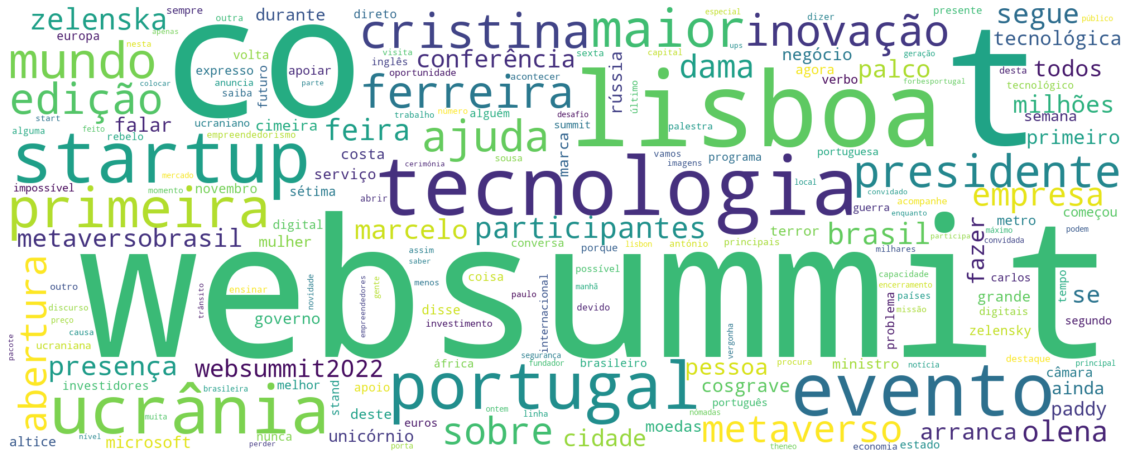

In [34]:
plot_cloudWord(portuguese_df, "cloud_word_pt.png")

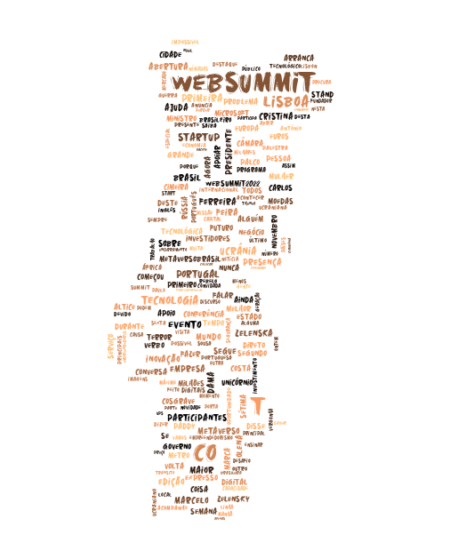

In [35]:
plot_cloudWord_map(portuguese_df, "map_pt.png")

In [52]:
df_date= portuguese_df.groupby(by=["day_week", "date_plub"]).size().reset_index(name="counts")
df_date = df_date.sort_values(by='counts',ascending=True)
cl = len(df['day_week'].unique())
px.bar(data_frame=df_date, x="date_plub", y="counts", color="day_week",  title=f'Tweets per day in Portuguese', text_auto=True)

## English

In [45]:
english_df.head()

,date,url,username,tweet,location,language,date_plub,time,day_week
2,2022-10-31 23:56:09+00:00,https://twitter.com/MeghanChayka/status/158723...,MeghanChayka,@FatouSadio Web summit?,"Toronto, Niagara",en,2022-10-31,23:56:09,Monday
3,2022-10-31 23:45:39+00:00,https://twitter.com/shineyd1111/status/1587229...,shineyd1111,@LeaksBlockchain Chico you coming to web summi...,Tulum Mexico,en,2022-10-31,23:45:39,Monday
5,2022-10-31 23:26:41+00:00,https://twitter.com/Rasmunssen/status/15872245...,Rasmunssen,@omalestafeito E a web summit!,NoLocation,en,2022-10-31,23:26:41,Monday
6,2022-10-31 23:19:45+00:00,https://twitter.com/SuriyaSubraman/status/1587...,SuriyaSubraman,The evolution of ethics in the world of big da...,"London, UK",en,2022-10-31,23:19:45,Monday
7,2022-10-31 23:17:08+00:00,https://twitter.com/generationhuh/status/15872...,generationhuh,@WebSummit Really terrible move on Web Summit'...,NoLocation,en,2022-10-31,23:17:08,Monday


In [46]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + list([ ',','.','https', ':','!', '#', '@', '?', '/', '|', '–', '-', '...'])

In [47]:
join_websubmmit(english_df)
english_df['filtered_text'] = english_df['tweet'].apply(lambda x: remove_stopwords(x))

In [48]:
english_df.head()

,date,url,username,tweet,location,language,date_plub,time,day_week,filtered_text
2,2022-10-31 23:56:09+00:00,https://twitter.com/MeghanChayka/status/158723...,MeghanChayka,@fatousadio websummit?,"Toronto, Niagara",en,2022-10-31,23:56:09,Monday,fatousadio websummit
3,2022-10-31 23:45:39+00:00,https://twitter.com/shineyd1111/status/1587229...,shineyd1111,@leaksblockchain chico you coming to websummit...,Tulum Mexico,en,2022-10-31,23:45:39,Monday,leaksblockchain chico coming websummit
5,2022-10-31 23:26:41+00:00,https://twitter.com/Rasmunssen/status/15872245...,Rasmunssen,@omalestafeito e a websummit!,NoLocation,en,2022-10-31,23:26:41,Monday,omalestafeito websummit
6,2022-10-31 23:19:45+00:00,https://twitter.com/SuriyaSubraman/status/1587...,SuriyaSubraman,the evolution of ethics in the world of big da...,"London, UK",en,2022-10-31,23:19:45,Monday,evolution ethics world websummit november mach...
7,2022-10-31 23:17:08+00:00,https://twitter.com/generationhuh/status/15872...,generationhuh,@websummit really terrible move on websummit's...,NoLocation,en,2022-10-31,23:17:08,Monday,websummit really terrible websummit


In [57]:
plot_topWords(english_df, 30, "The top 30 words in English")

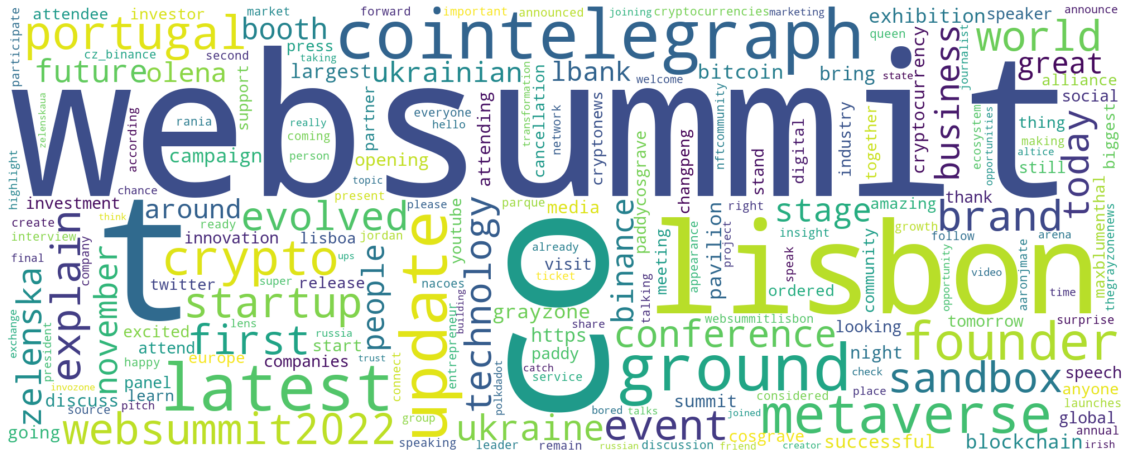

In [50]:
plot_cloudWord(english_df, "cloud_word_en.png")

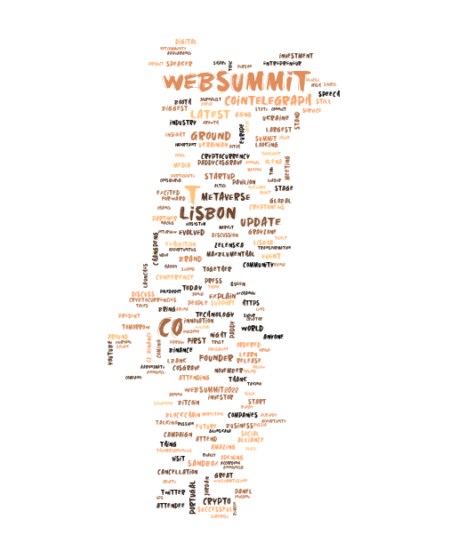

In [51]:
plot_cloudWord_map(english_df, "map_en.png")

In [54]:
df_date= english_df.groupby(by=["day_week", "date_plub"]).size().reset_index(name="counts")
df_date = df_date.sort_values(by='counts',ascending=True)
cl = len(df['day_week'].unique())
px.bar(data_frame=df_date, x="date_plub", y="counts", color="day_week",  title=f'Tweets per day in English', text_auto=True)